In [2]:
pip install fbprophet

Technique 2: For task 2 we can do using below method also
Click Prediction using fbprophet python library

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib .pyplot as plt
import fbprophet
from sklearn.metrics import mean_absolute_error

In [6]:
data = pd.read_csv('/content/clicks.csv')
data.head()

,date_ymd,click_count
0,20190101,19712
1,20190102,22632
2,20190103,22579
3,20190104,20716
4,20190105,21953


"""Converting data into proper date format """


In [9]:
data['date_ymd'] = data['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data.head()


,date_ymd,click_count
0,2019-01-01,19712
1,2019-01-02,22632
2,2019-01-03,22579
3,2019-01-04,20716
4,2019-01-05,21953


"""A Timestamp is said to be stationary if its statistical properties such as mean, variance remain constant over time"""

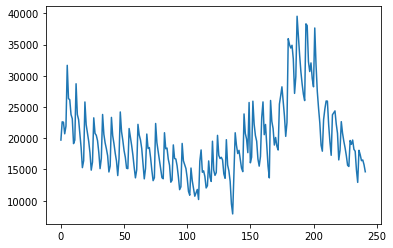

In [11]:
plt.plot(data.click_count)

In [12]:
plt.show()

"it is showing there is increasing in the trend in the month of july but we cannot say by seeing this graph there is some seasonality "

In [14]:
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])
data

,ds,y
0,2019-01-01,19712
1,2019-01-02,22632
2,2019-01-03,22579
3,2019-01-04,20716
4,2019-01-05,21953
...,...,...
237,2019-08-26,17345
238,2019-08-27,16409
239,2019-08-28,16524
240,2019-08-29,15766


In [15]:
##Defining the model
model = fbprophet.Prophet(daily_seasonality=True)
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


creating new test data which is present in the original data to see the prediction is good or not.
Taking the dataset of 8th month data which is available in the dataset 



In [17]:
test = pd.DataFrame(pd.date_range(start="2019-08-01",end="2019-08-30").to_pydatetime().tolist())
test.columns = ['ds']
test.head()

,ds
0,2019-08-01
1,2019-08-02
2,2019-08-03
3,2019-08-04
4,2019-08-05


Forecasting the test model

In [18]:
forecast = model.predict(test)

          ds          yhat    yhat_lower    yhat_upper
0 2019-08-01  22206.443726  18623.862772  25475.417846
1 2019-08-02  19503.888642  16122.923312  23087.379150
2 2019-08-03  19730.977055  16423.383746  23025.856331
3 2019-08-04  26963.554524  23802.099333  30244.867373
4 2019-08-05  24651.465521  21496.536603  27717.595157


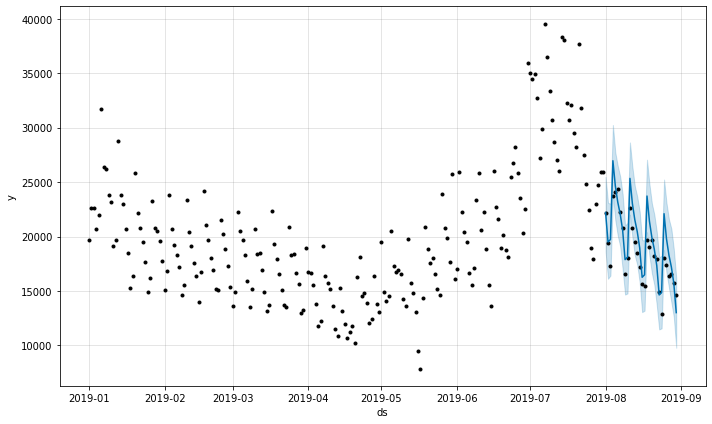

In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

In [20]:
forecast[['ds', 'yhat']].tail()


,ds,yhat
25,2019-08-26,19785.829617
26,2019-08-27,18291.712059
27,2019-08-28,17205.132271
28,2019-08-29,15718.929187
29,2019-08-30,13016.374103


In [21]:
data.tail()

,ds,y
237,2019-08-26,17345
238,2019-08-27,16409
239,2019-08-28,16524
240,2019-08-29,15766
241,2019-08-30,14633


In [22]:
# calculate MAE between expected and predicted values for december
y_true = data['y'][-30:].values
y_pred = forecast['yhat'].values

In [23]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [24]:
MAPE(y_pred , y_true)

7.704587240956191

mape value is less than 10 so it is very good model

In [25]:
# now creating new dataset for september month to forecast the click count
new = pd.DataFrame(pd.date_range(start="2019-09-01",end="2019-09-30").to_pydatetime().tolist())
new.columns = ['ds']
new.head()

,ds
0,2019-09-01
1,2019-09-02
2,2019-09-03
3,2019-09-04
4,2019-09-05


          ds          yhat
0 2019-09-01  20476.039985
1 2019-09-02  18163.950982
2 2019-09-03  16669.833425
3 2019-09-04  15583.253637
4 2019-09-05  14097.050552


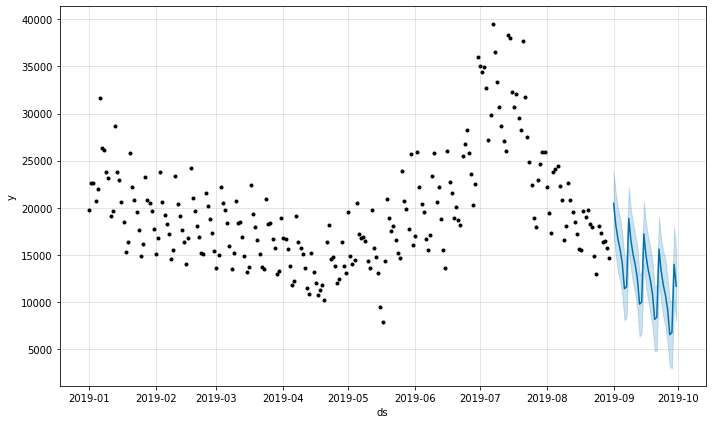

In [26]:
# forecasting on the new data
forecast_new = model.predict(new)
# summarize the forecast
print(forecast_new[['ds', 'yhat']].head())
# plot forecast
model.plot(forecast_new)
plt.show()